This notebook will analyze the intensities and errors of CO 2-1 emission at the locations of all of the SNe in our sample across all of the resolutions in the survey.

We will use this to uncover what resolution will be best for this study.

This notebook produces figure 2 and the MGSD percentiles table.


In [1]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/PythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats

In [2]:
#import SNe data 

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', 'galaxy'))


In [3]:

#This database is only holding the SNe that have 150pc maps and is missing 1988A, 1989M, 2018ivc, 2017gax
# and we need to pull the IIns (2019qyl, 2019krl, 1997bs)

for i in range(len(database["SN_name"])):
    print(i, database["SN_name"][i], database["SN_type"][i])

0 ASASSN-14ha II
1 SN1901B I
2 SN1923A II
3 SN1926A II
4 SN1935C unclassified
5 SN1940E I
6 SN1950B unclassified
7 SN1957D unclassified
8 SN1959E I
9 SN1960F Ia
10 SN1961I II
11 SN1964F II
12 SN1967H II
13 SN1968L II
14 SN1972Q II
15 SN1973R II
16 SN1979C II
17 SN1981B Ia
18 SN1983N Ib
19 SN1983V Ic
20 SN1984J II
21 SN1985P II
22 SN1986G Ia
23 SN1986I II
24 SN1986L II
25 SN1988A II
26 SN1988M II
27 SN1989B Ia
28 SN1989M Ia
29 SN1992bd II
30 SN1993Z Ia
31 SN1995V II
32 SN1996cr II
33 SN1999em II
34 SN1999eu II
35 SN1999gn II
36 SN2001du II
37 SN2003jg Ic
38 SN2005at Ic
39 SN2005df Ia
40 SN2006X Ia
41 SN2006ov II
42 SN2007it II
43 SN2008bk II
44 SN2008eh unclassified
45 SN2009hd II
46 SN2009ib II
47 SN2010el Ia
48 SN2011ja II
49 SN2012A II
50 SN2012cg Ia
51 SN2012fr Ia
52 SN2013ej II
53 SN2014L Ic
54 SN2014dt Ia
55 SN2016adj IIb
56 SN2016cok II
57 SN2017gax Ib/c
58 SN2018ivc II
59 SN2019ehk Ib
60 SN2020jfo II
61 SN2020nvb Ia
62 SN2020oi Ic


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def setupBar(low, high, resArray, resStr):
    '''
    set up figure 2 barplot.
    
    '''
    lowStr = "No or Weak Detection (S/N < " + str(low) + ")"
    midStr = "Moderate Detection (" + str(low) + " < S/N < " + str(high) + ")"
    upStr  = "Strong Detection (" + str(high) + " < S/N)" 

    x = [lowStr, midStr, upStr]
    x_pos = [i for i, _ in enumerate(x)]

    lowCtr, midCtr, upCtr = 0,0,0

    for i in range(len(resArray)):
        if resArray[i] < low:
            lowCtr += 1
        elif resArray[i] > low and resArray[i] < high:
            midCtr += 1
        elif resArray[i] > high:
            upCtr += 1
    
    bars = [lowCtr, midCtr, upCtr]

    return(x, x_pos, bars)    


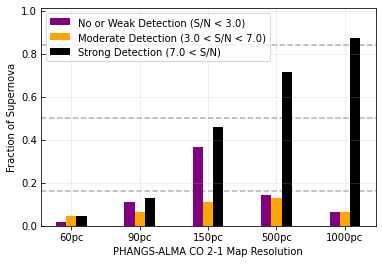

<Figure size 432x288 with 0 Axes>

In [5]:
low, high = 3.0, 7.0
x60, x_pos60, bar60     = setupBar(low, high, database['pc60SNR'], '60pc')
x90, x_pos90, bar90     = setupBar(low, high, database['pc90SNR'], '90pc')
x120, x_pos120, bar120   = setupBar(low, high, database['pc120SNR'], '120pc')
x150, x_pos150, bar150   = setupBar(low, high, database['pc150SNR'], '150pc')
x500, x_pos500, bar500   = setupBar(low, high, database['pc500SNR'], '500pc')
x750, x_pos750, bar750   = setupBar(low, high, database['pc750SNR'], '750pc')
x1000, x_pos1000, bar1000 = setupBar(low, high, database['pc1000SNR'], '1000pc')

sampleSize = len(database['SN_name'])
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.15  # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True, alpha = 0.25)
ax.axhline(y=0.16, ls = '--', color = 'k', alpha = 0.3, zorder=0)
ax.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)
ax.axhline(y=0.84, ls = '--', color = 'k', alpha = 0.3)
rects1 = ax.bar(ind[0], bar60[0]/sampleSize, width, color='purple')
rects2 = ax.bar(ind[1], bar90[0]/sampleSize, width, color='purple')
rects3 = ax.bar(ind[2], bar150[0]/sampleSize, width, color='purple')
rects4 = ax.bar(ind[3], bar500[0]/sampleSize, width, color='purple')
rects7 = ax.bar(ind[4], bar1000[0]/sampleSize, width, color='purple')
rects1 = ax.bar(ind[0]+width, bar60[1]/sampleSize, width, color='orange')
rects2 = ax.bar(ind[1]+width, bar90[1]/sampleSize, width, color='orange')
rects3 = ax.bar(ind[2]+width, bar150[1]/sampleSize, width, color='orange')
rects4 = ax.bar(ind[3]+width, bar500[1]/sampleSize, width, color='orange')
rects8 = ax.bar(ind[4]+width, bar1000[1]/sampleSize, width, color='orange')
rects1 = ax.bar(ind[0]+2*width, bar60[2]/sampleSize, width, color='black')
rects2 = ax.bar(ind[1]+2*width, bar90[2]/sampleSize, width, color='black')
rects3 = ax.bar(ind[2]+2*width, bar150[2]/sampleSize, width, color='black')
rects4 = ax.bar(ind[3]+2*width, bar500[2]/sampleSize, width, color='black')
rects9 = ax.bar(ind[4]+2*width, bar1000[2]/sampleSize, width, color='black')
ax.set_ylabel('Fraction of Supernova')
ax.set_ylim(0.0,1.01)
ax.set_xticks(ind + width)
ax.tick_params(axis='y', direction='in')
ax.set_xticklabels(['60pc', '90pc', '150pc', '500pc', '1000pc'])
ax.set_xlabel("PHANGS-ALMA CO 2-1 Map Resolution")
ax.legend((rects7[0], rects8[0],rects9[0]), (x60))
plt.show()
plt.tight_layout()
fig.savefig('../Figures/SNR_Dist_BySNR.png', dpi=300)

In [6]:
print(bar1000)
print(bar150)

[4, 4, 55]
[23, 7, 29]


In [7]:
for i in range(len(database)):
    print(database['pc1000Int'][i],database['galaxy'][i])
    

27.377416610717773 ngc1566
5.013950347900391 ngc4321
5.028407096862793 ngc5236
0.5659606456756592 ngc4303
1.971544861793518 ngc1511
142.72422790527344 ngc0253
15.898970603942871 ngc5236
7.795499324798584 ngc5236
11.592008590698242 ngc4321
1.4647822380065918 ngc4496a
1.7532508373260498 ngc4303
4.0076904296875 ngc4303
13.661224365234375 ngc4254
95.94841766357422 ngc5236
1.1837623119354248 ngc4254
13.984562873840332 ngc3627
1.7327972650527954 ngc4321
0.2137349545955658 ngc4536
2.1873528957366943 ngc5236
2.623316764831543 ngc1365
9.223339080810547 ngc1559
0.317399799823761 ngc1433
17.113990783691406 ngc5128
16.13823890686035 ngc4254
2.3609507083892822 ngc1559
1.7538065910339355 ngc4579
0.0 ngc4496a
34.73579406738281 ngc3627
3.107386350631714 ngc4579
167.37948608398438 ngc1097
2.4687201976776123 ngc2775
4.203847885131836 ngc1087
81.1122817993164 circinus
3.8686399459838867 ngc1637
0.0 ngc1097
7.122220516204834 ngc4303
2.6764848232269287 ngc1365
35.72654724121094 ngc2997
1.8349125385284424 n

In [8]:

def percentiles(array):

    vals = np.asarray(array)
    
    for i in range(len(vals)):
        if vals[i] < 0.0:
            vals[i] = 0.0
    
    vals = vals[np.isfinite(vals)]
    
    percentile = np.linspace(0,1,len(vals))
    stats = findStats(percentile, vals)

    return(stats, len(vals))

def mgsdPercentiles(res):

    msgdStr = "pc" + str(res) + "mgsd"
    errStr = "pc" + str(res) + "mgsdErr"

    mgsdgroup = database.group_by([msgdStr, errStr])

    mgsdSort, errSort = [],[]
    
    for i in range(len(mgsdgroup)):
        if np.isfinite(mgsdgroup[msgdStr][i]):
            mgsdSort.append(mgsdgroup[msgdStr][i])
            errSort.append(mgsdgroup[errStr][i])
        else:
            pass

    mgsdVals, num = percentiles(mgsdSort)
    mgsdErrVals, num = percentiles(errSort)

        
    return(mgsdVals, mgsdErrVals, num)


In [ ]:
print()

In [12]:
# Make Latex Table : MGSD Percentiles at all resolutions

pc60mgsdTiles,   pc60mgsdErrTiles,   numPc60   = mgsdPercentiles(60)
pc90mgsdTiles,   pc90mgsdErrTiles,   numPc90   = mgsdPercentiles(90)
pc120mgsdTiles,  pc120mgsdErrTiles,  numPc120  = mgsdPercentiles(120)
pc150mgsdTiles,  pc150mgsdErrTiles,  numPc150  = mgsdPercentiles(150)
pc500mgsdTiles,  pc500mgsdErrTiles,  numPc500  = mgsdPercentiles(500)
pc750mgsdTiles,  pc750mgsdErrTiles,  numPc750  = mgsdPercentiles(750)
pc1000mgsdTiles, pc1000mgsdErrTiles, numPc1000 = mgsdPercentiles(1000)

# Build latex Table

MAGICnumSNe = float(len(database))

columns  = ["Resolution", "Percent Sample Size", "5th \%ile" ,"16th \%ile" ,"50th \%ile" ,"84th \%ile" ,"95th \%ile", "\% non/weak", "\% moderate", "\% strong"]
stats_60 = ["60pc", round(numPc60/MAGICnumSNe*100,1), str(pc60mgsdTiles[0]) + "$\pm$" + str(pc60mgsdErrTiles[0]), str(pc60mgsdTiles[1]) + "$\pm$" + str(pc60mgsdErrTiles[1]),  str(pc60mgsdTiles[2]) + "$\pm$" + str(pc60mgsdErrTiles[2]), str(pc60mgsdTiles[3]) + "$\pm$" + str(pc60mgsdErrTiles[3]),  str(pc60mgsdTiles[4]) + "$\pm$" + str(pc60mgsdErrTiles[4]), round(bar60[0]/numPc60*100,1), round(bar60[1]/numPc60*100,1), round(bar60[2]/numPc60*100,1)]
stats_90 = ["90pc", round(numPc90/MAGICnumSNe*100,1), str(pc90mgsdTiles[0]) + "$\pm$" + str(pc90mgsdErrTiles[0]), str(pc90mgsdTiles[1]) + "$\pm$" + str(pc90mgsdErrTiles[1]),  str(pc90mgsdTiles[2]) + "$\pm$" + str(pc90mgsdErrTiles[2]), str(pc90mgsdTiles[3]) + "$\pm$" + str(pc90mgsdErrTiles[3]),  str(pc90mgsdTiles[4]) + "$\pm$" + str(pc90mgsdErrTiles[4]), round(bar90[0]/numPc90*100,1), round(bar90[1]/numPc90*100,1), round(bar90[2]/numPc90*100,1)]
stats_120 = ["120pc", round(numPc120/MAGICnumSNe*100,1), str(pc120mgsdTiles[0]) + "$\pm$" + str(pc120mgsdErrTiles[0]), str(pc120mgsdTiles[1]) + "$\pm$" + str(pc120mgsdErrTiles[1]),  str(pc120mgsdTiles[2]) + "$\pm$" + str(pc120mgsdErrTiles[2]), str(pc120mgsdTiles[3]) + "$\pm$" + str(pc120mgsdErrTiles[3]),  str(pc120mgsdTiles[4]) + "$\pm$" + str(pc120mgsdErrTiles[4]), round(bar120[0]/numPc120*100,1), round(bar120[1]/numPc120*100,1), round(bar120[2]/numPc120*100,1)]
stats_150 = ["150pc", round(numPc150/MAGICnumSNe*100,1), str(pc150mgsdTiles[0]) + "$\pm$" + str(pc150mgsdErrTiles[0]), str(pc150mgsdTiles[1]) + "$\pm$" + str(pc150mgsdErrTiles[1]),  str(pc150mgsdTiles[2]) + "$\pm$" + str(pc150mgsdErrTiles[2]), str(pc150mgsdTiles[3]) + "$\pm$" + str(pc150mgsdErrTiles[3]),  str(pc150mgsdTiles[4]) + "$\pm$" + str(pc150mgsdErrTiles[4]), round(bar150[0]/numPc150*100,1), round(bar150[1]/numPc150*100,1), round(bar150[2]/numPc150*100,1)]
stats_500 = ["500pc", round(numPc500/MAGICnumSNe*100,1), str(pc500mgsdTiles[0]) + "$\pm$" + str(pc500mgsdErrTiles[0]), str(pc500mgsdTiles[1]) + "$\pm$" + str(pc500mgsdErrTiles[1]),  str(pc500mgsdTiles[2]) + "$\pm$" + str(pc500mgsdErrTiles[2]), str(pc500mgsdTiles[3]) + "$\pm$" + str(pc500mgsdErrTiles[3]),  str(pc500mgsdTiles[4]) + "$\pm$" + str(pc500mgsdErrTiles[4]), round(bar500[0]/numPc500*100,1), round(bar500[1]/numPc500*100,1), round(bar500[2]/numPc500*100,1)]
stats_750 = ["750pc", round(numPc750/MAGICnumSNe*100,1), str(pc750mgsdTiles[0]) + "$\pm$" + str(pc750mgsdErrTiles[0]), str(pc750mgsdTiles[1]) + "$\pm$" + str(pc750mgsdErrTiles[1]),  str(pc750mgsdTiles[2]) + "$\pm$" + str(pc750mgsdErrTiles[2]), str(pc750mgsdTiles[3]) + "$\pm$" + str(pc750mgsdErrTiles[3]),  str(pc750mgsdTiles[4]) + "$\pm$" + str(pc750mgsdErrTiles[4]), round(bar750[0]/numPc750*100,1), round(bar750[1]/numPc750*100,1), round(bar750[2]/numPc750*100,1)]
stats_1000 = ["1000pc", round(numPc1000/MAGICnumSNe*100,1), str(pc1000mgsdTiles[0]) + "$\pm$" + str(pc1000mgsdErrTiles[0]), str(pc1000mgsdTiles[1]) + "$\pm$" + str(pc1000mgsdErrTiles[1]),  str(pc1000mgsdTiles[2]) + "$\pm$" + str(pc1000mgsdErrTiles[2]), str(pc1000mgsdTiles[3]) + "$\pm$" + str(pc1000mgsdErrTiles[3]),  str(pc1000mgsdTiles[4]) + "$\pm$" + str(pc1000mgsdErrTiles[4]), round(bar1000[0]/numPc1000*100,1), round(bar1000[1]/numPc1000*100,1), round(bar1000[2]/numPc1000*100,1)]

statsArr = [stats_60,stats_90,stats_120,stats_150,stats_500,stats_750,stats_1000]
print(columns)
print()

for i in range(len(statsArr)):
    for j in range(len(stats_60)):
        print(statsArr[i][j], end=" ")
        if j < len(stats_60)-1: print("&", end = " ")
        else: print("\\")



['Resolution', 'Percent Sample Size', '5th \\%ile', '16th \\%ile', '50th \\%ile', '84th \\%ile', '95th \\%ile', '\\% non/weak', '\\% moderate', '\\% strong']

60pc & 11.1 & 16.38$\pm$4.12 & 19.96$\pm$3.93 & 38.86$\pm$6.8 & 414.73$\pm$4.36 & 1099.54$\pm$6.42 & 14.3 & 42.9 & 42.9 \
90pc & 30.2 & 0.0$\pm$7.02 & 0.0$\pm$7.61 & 21.44$\pm$2.92 & 213.91$\pm$2.58 & 447.89$\pm$3.09 & 36.8 & 21.1 & 42.1 \
120pc & 74.6 & 0.0$\pm$10.74 & 0.03$\pm$5.51 & 29.19$\pm$7.14 & 217.27$\pm$5.08 & 500.62$\pm$6.88 & 36.2 & 17.0 & 46.8 \
150pc & 93.7 & 0.0$\pm$3.33 & 0.1$\pm$4.79 & 25.12$\pm$4.98 & 266.56$\pm$5.85 & 936.34$\pm$10.71 & 39.0 & 11.9 & 49.2 \
500pc & 98.4 & 0.0$\pm$2.21 & 5.04$\pm$1.38 & 27.76$\pm$0.24 & 189.55$\pm$0.97 & 558.24$\pm$1.24 & 14.5 & 12.9 & 72.6 \
750pc & 100.0 & 0.0$\pm$1.33 & 4.79$\pm$1.13 & 29.03$\pm$1.09 & 154.3$\pm$0.53 & 689.08$\pm$0.51 & 7.9 & 11.1 & 81.0 \
1000pc & 100.0 & 0.0$\pm$0.83 & 5.35$\pm$0.82 & 27.76$\pm$0.24 & 134.17$\pm$0.33 & 639.16$\pm$0.41 & 6.3 & 6.3 & 87.3 \


In [11]:
print(len(database))

63
